In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


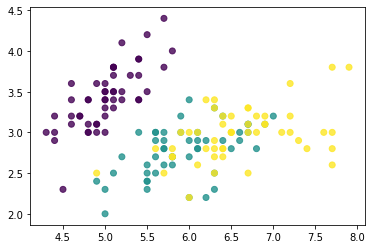

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

# Train Test Split (pour diviser le DataSet)

In [3]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('X train:', X_train.shape)
print('X test:', X_test.shape)

X train: (120, 4)
X test: (30, 4)


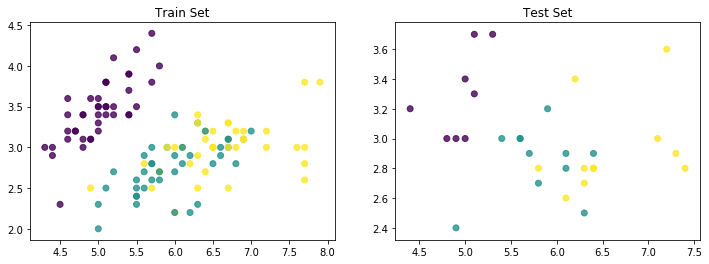

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train Set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test Set')
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Pas conseillé

model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.9833333333333333
Test score: 0.9666666666666667


# Validation Set et Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(KNeighborsClassifier(1), X_train, y_train, cv=5, scoring='accuracy').mean()

0.975

# Méthode 1: Recherche de k n voisin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

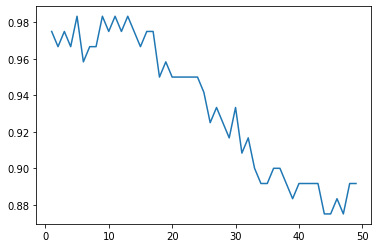

In [21]:
# Méthode 1

val_score = []
for k in range(0, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# Méthode 2: Validation Curve

In [22]:
from sklearn.model_selection import validation_curve

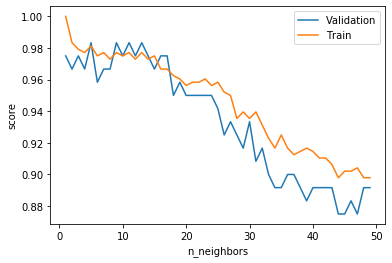

In [24]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label= 'Validation')
plt.plot(k, train_score.mean(axis=1), label= 'Train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

# Méthode 3: GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']} # Hyperparamètres à régler

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
# Le meilleur score

grid.best_score_

0.9833333333333334

In [28]:
# Les meilleurs paramètres

grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [29]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

# Confusion Matrix (Voir les erreurs du model)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

# Learnig_Curve (La courbe d'apprentissage du model)

In [2]:
from sklearn.model_selection import learning_curve

In [3]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 5), cv=5)

print(N)

NameError: name 'model' is not defined

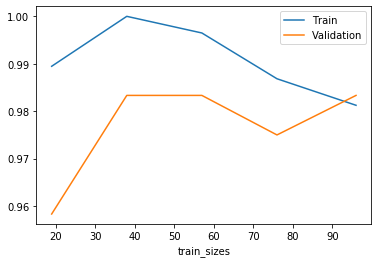

In [34]:
plt.plot(N, train_score.mean(axis=1), label='Train')
plt.plot(N, val_score.mean(axis=1), label='Validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()